In [1]:
#https://pypi.org/project/pyEDFlib/
import sys, os
sys.path.append(os.path.realpath("/home/saqibm128/miniconda3/envs/keras/lib/python3.7/site-packages"))
import pandas as pd
import numpy as np
import pyedflib as edf
import matplotlib.pyplot as plt
import util_funcs
import data_reader as read
from importlib import reload

In [2]:
reload(read)
edf_data_paths = read.get_all_token_file_names('dev_test', "01_tcp_ar")
# data, ann = read.get_edf_data_and_label_ts_format(edf_data_paths[0])

In [7]:
edf_data = read.EdfDataset('dev_test', '01_tcp_ar')

In [4]:
edf_data[0]

(                 EEG FP1-REF  EEG FP2-REF  EEG F3-REF  EEG F4-REF  EEG C3-REF  \
 00:00:00           30.602539    77.391129   16.206050   70.192885    4.508903   
 00:00:00.003906    22.504514    68.393323    7.208245   65.693982   -0.889781   
 00:00:00.007812    18.905392    62.994640   14.406489   65.693982    0.010000   
 00:00:00.011718    14.406489    59.395518   11.707147   63.894421   -8.088025   
 00:00:00.015624    21.604734    66.593762    9.007806   73.792007    4.508903   
 00:00:00.019530    19.805173    63.894421   11.707147   74.691787    2.709342   
 00:00:00.023436    13.506709    53.996834    5.408683   71.992446    0.010000   
 00:00:00.027342     9.907586    53.097054    4.508903   71.992446   -3.589122   
 00:00:00.031248    17.105831    57.595957    8.108025   77.391129   -0.889781   
 00:00:00.035154    15.306270    54.896615    8.108025   78.290910    0.010000   
 00:00:00.039060     9.007806    51.297493    3.609122   74.691787   -4.488903   
 00:00:00.042966

In [14]:
dp_0 = edf_data[0] #datapoint

In [44]:
dp_1 = edf_data[1]

(69636, 32)

In [23]:
dp_0[0].values.shape

(5120, 32)

In [75]:
original_data = dp_0 #better name

In [77]:
original_data

Index(['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF',
       'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF',
       'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF',
       'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG EKG-REF',
       'EEG A1-REF', 'EEG A2-REF', 'EEG T1-REF', 'EEG T2-REF', 'EEG SP1-REF',
       'EEG SP2-REF', 'EEG LUC-REF', 'EEG RLC-REF', 'EEG RESP1-REF',
       'EEG RESP2-REF', 'EEG 31-REF', 'EEG 32-REF'],
      dtype='object')

In [86]:
fft_data = np.abs(np.fft.fft(dp_0[0].values))
fft_freq = np.fft.fftfreq(fft_data.shape[0], d=1/256)
fft_freq_bins = list(range(50))
new_fft_hist = pd.DataFrame(index=fft_freq_bins[:-1], columns=original_data[0].columns)
for i, name in enumerate(original_data[0].columns):
    new_fft_hist[name] = np.histogram(fft_freq, bins=fft_freq_bins, weights=fft_data[:,i])[0]


In [113]:
reload(util_funcs)
reload(read)
edf_data = read.EdfDataset('dev_test', '01_tcp_ar')
fft_data = read.EdfFFTDatasetTransformer(edf_data)

In [115]:
max_eeg = 20

In [116]:
import time
start = time.time()
data = fft_data[0:max_eeg]
print("benchmark for {} eegs: {}".format(max_eeg, time.time()-start))

benchmark for 20 eegs: 18.021440744400024


In [77]:
#without multiprocessing
import time
start = time.time()
for i in range(20):
    dp = fft_data[i]
print(time.time()-start)

58.31904983520508


In [78]:
#with a pool
reload(read)
start = time.time()
dp = fft_data[0:20]
print(time.time()-start)

53.84441137313843


In [80]:
reload(read)

<module 'data_reader' from '/mnt/c/Users/sawer/src/dbmi/dbmi_eeg_clustering/data_reader.py'>

In [89]:
#with processes
reload(read)
start = time.time()
dp = fft_data[0:20]
print(time.time()-start)

16.787282466888428


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()

In [117]:
fft_x = [datum[0].values.shape for datum in data]
cols = [set(datum[0].dropna().columns) for datum in data]
common_cols = list(cols[0].intersection(*cols))

In [120]:
fft_x = np.array([datum[0][common_cols].values for datum in data[0:max_eeg]])

In [121]:
fft_x = fft_x.reshape(max_eeg, -1)

In [123]:
np.isnan(fft_x).any(axis=1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [124]:
pca.fit(fft_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[2.16293366e+16 1.45177157e+16 3.31873115e+15 1.30286007e+15
 5.43894810e+14 4.13281807e+14 3.49655329e+14 2.46510684e+14
 2.18364332e+14 1.46541469e+14 9.13263004e+13 5.02684948e+13
 4.29010154e+13 1.49108212e+13 1.31045558e+13 7.67342985e+12
 6.45707819e+12 4.59133968e+12 1.44438722e+12 2.98922376e-16]


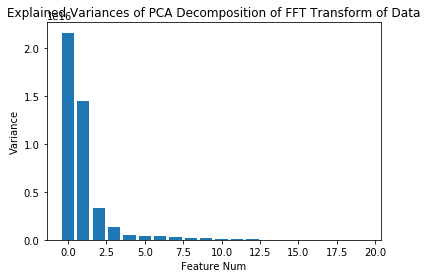

In [126]:
plt.bar([i for i in range(max_eeg)], pca.explained_variance_)
plt.title("Explained Variances of PCA Decomposition of FFT Transform of Data")
plt.ylabel("Variance")
plt.xlabel("Feature Num")
print(pca.explained_variance_)

In [38]:
range(*slice(1,5).indices(100000000))

range(1, 5)

In [39]:

slice

slice

In [11]:
1:10

SyntaxError: illegal target for annotation (<ipython-input-11-fb572e210018>, line 1)